In [1]:
from utils import *
from matplotlib import pyplot as plt

In [80]:
from PIL import Image
import numpy as np

In [2]:
filepath = '../data/YUVs/BasketballPass_416x240_50.yuv'

In [25]:
width = 416
height = 240
size = (height, width)

In [106]:
def read_YUV420(filepath, size, frame=0, channel='Y'):
    
    pos = frame*size[0]*size[1]*6//4
    if channel in ['U', 'u', 'Cb', 'cb']:
        pos += size[0]*size[1]
        size = (size[0]//2, size[1]//2)
    elif channel in ['V', 'v', 'Cr', 'cr']:
        pos += size[0]*size[1]*5//4
        size = (size[0]//2, size[1]//2)
    
    with open(filepath, 'rb') as f:
        f.seek(pos, 0)
        img = Image.frombytes('L', [size[1], size[0]], f.read(size[1]*size[0]))
    
    return np.asarray(img)/255.

In [107]:
%timeit read_YCbCr420(filepath, size, 10, 'Y')

171 µs ± 5.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [108]:
def read_YUV420_multiframes(filepath, size, frames, channel='Y'):
    
    pos = [frame*size[0]*size[1]*6//4 for frame in frames]
    if channel in ['U', 'u', 'Cb', 'cb']:
        pos = [p + size[0]*size[1] for p in pos]
        size = (size[0]//2, size[1]//2)
    elif channel in ['V', 'v', 'Cr', 'cr']:
        pos = [p + size[0]*size[1]*5//4 for p in pos]
        size = (size[0]//2, size[1]//2)
    
    data = np.empty((len(frames), *size))
    
    with open(filepath, 'rb') as f:
        for i in range(len(pos)):
            p = pos[i]
            f.seek(p, 0)
            img = Image.frombytes('L', [size[1], size[0]], f.read(size[1]*size[0]))
            data[i,:,:] = np.asarray(img)/255.
             
    return data

In [109]:
y = read_YUV420_multiframes(filepath, size, [0, 300], channel='Y')

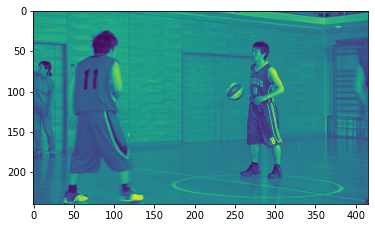

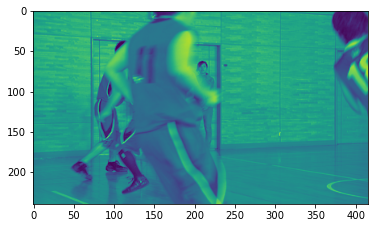

In [110]:
for i in range(2):
    plt.imshow(y[i,:,:])
    plt.show()

In [111]:
u = read_YUV420_multiframes(filepath, size, [0, 300], channel='cb')

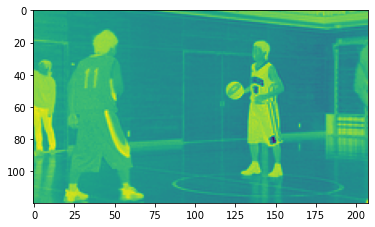

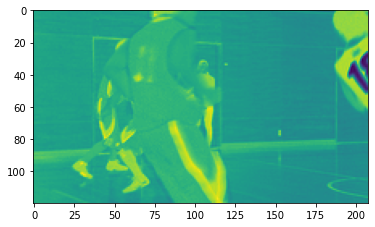

In [112]:
for i in range(2):
    plt.imshow(u[i,:,:])
    plt.show()